In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
train = pd.read_csv('housing.csv')


In [63]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [64]:
train['brm_over_rm'] = train['total_bedrooms']/train['total_rooms']
train['hhold_over_pop'] = train['households']/train['population']

In [65]:
train['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [66]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
train['ocean_proximity'] = label_encoder.fit_transform(train['ocean_proximity'])

In [67]:
train_orig = train.copy()
train_dist = train.copy()
train_drop = train.copy()
train_mean = train.copy()

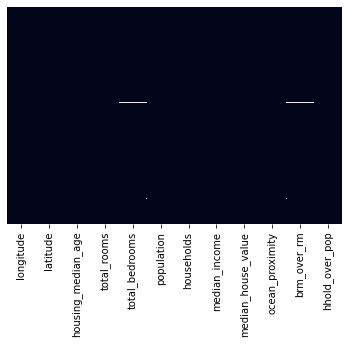

In [68]:
sns.heatmap(train_orig.isnull(),yticklabels=False,cbar=False)

In [69]:
print("% of unknown/missing data" , train.isna().sum()/len(train)*100, sep='\n')

% of unknown/missing data
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
brm_over_rm           1.002907
hhold_over_pop        0.000000
dtype: float64


In [70]:
train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
brm_over_rm           float64
hhold_over_pop        float64
dtype: object

In [71]:
total_bedrooms_dist = train_dist.total_bedrooms.value_counts(normalize=True)
missing = train_dist['total_bedrooms'].isnull()
train_dist.loc[missing,'total_bedrooms'] = np.random.choice(total_bedrooms_dist.index, 
                                                 size=len(train_dist[missing]),p=total_bedrooms_dist.values)

In [97]:
train_dist.min()

longitude              -124.300000
latitude                 32.540000
housing_median_age        1.000000
median_income             0.499900
median_house_value    14999.000000
ocean_proximity           0.000000
brm_over_rm               0.100000
hhold_over_pop            0.000804
dtype: float64

In [72]:
print("% of unknown/missing data" , train_dist.isna().sum()/len(train_dist)*100, sep='\n')

% of unknown/missing data
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.000000
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
brm_over_rm           1.002907
hhold_over_pop        0.000000
dtype: float64


In [73]:
train_drop.dropna(axis=0, inplace=True)
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int64  
 10  brm_over_rm         20433 non-null  float64
 11  hhold_over_pop      20433 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 2.0 MB


In [74]:
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  int64  
 10  brm_over_rm         20433 non-null  float64
 11  hhold_over_pop      20433 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 2.0 MB


In [75]:
train_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
 10  brm_over_rm         20433 non-null  float64
 11  hhold_over_pop      20640 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


In [76]:
train_mean = train_mean.fillna(train_mean.mean())

In [77]:
train_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
 10  brm_over_rm         20640 non-null  float64
 11  hhold_over_pop      20640 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


In [78]:
train_mean.drop('total_bedrooms', axis = 1, inplace = True)
train_mean.drop('total_rooms', axis = 1, inplace = True)
train_mean.drop('population', axis = 1, inplace = True)
train_mean.drop('households', axis = 1, inplace = True)



train_dist.drop('total_bedrooms', axis = 1, inplace = True)
train_dist.drop('total_rooms', axis = 1, inplace = True)
train_dist.drop('population', axis = 1, inplace = True)
train_dist.drop('households', axis = 1, inplace = True)

train_drop.drop('total_bedrooms', axis = 1, inplace = True)
train_drop.drop('total_rooms', axis = 1, inplace = True)
train_drop.drop('population', axis = 1, inplace = True)
train_drop.drop('households', axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc6983ad90>,
      dtype=object)

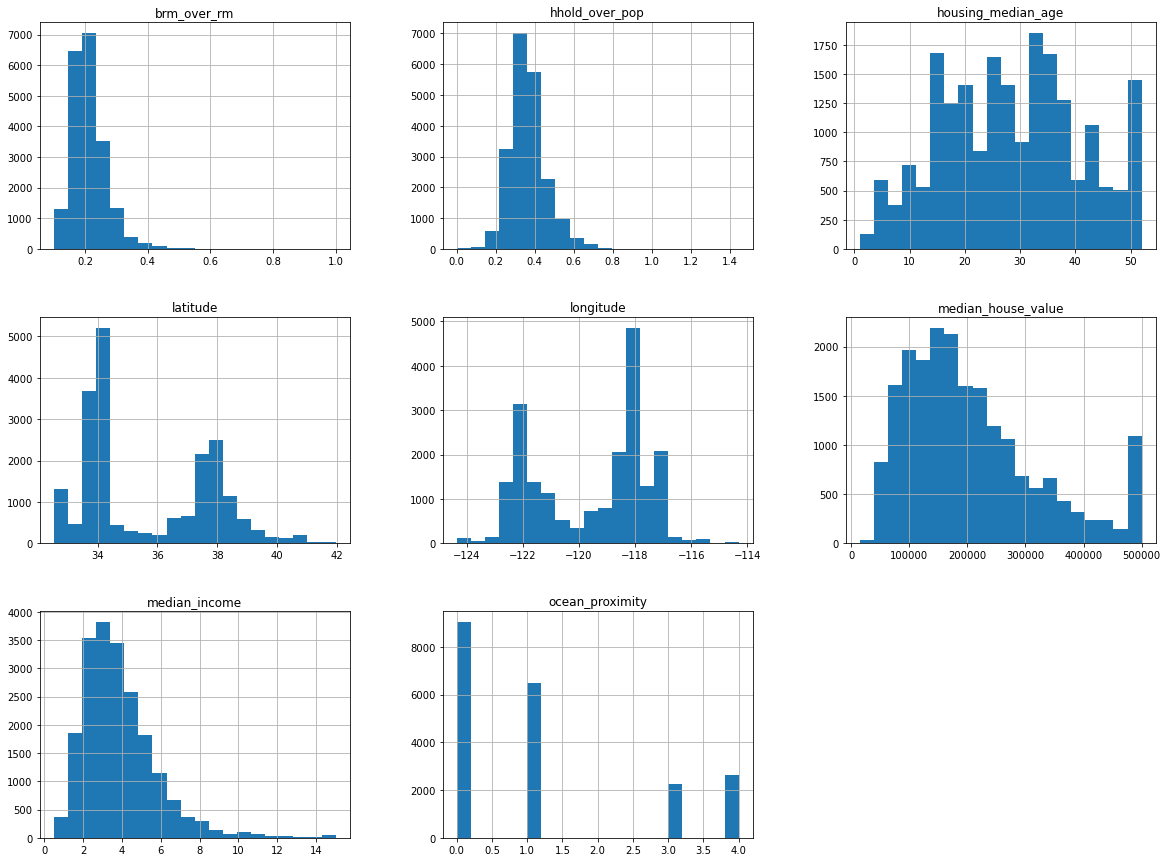

In [79]:
train_drop.hist(bins=20,figsize=(20,15))

In [80]:
train_drop = train_drop[(train_drop['housing_median_age']) < 50]
train_dist = train_dist[(train_dist['housing_median_age']) < 50]
train_mean = train_mean[(train_mean['housing_median_age']) < 50]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffc6c56c130>,
      dtype=object)

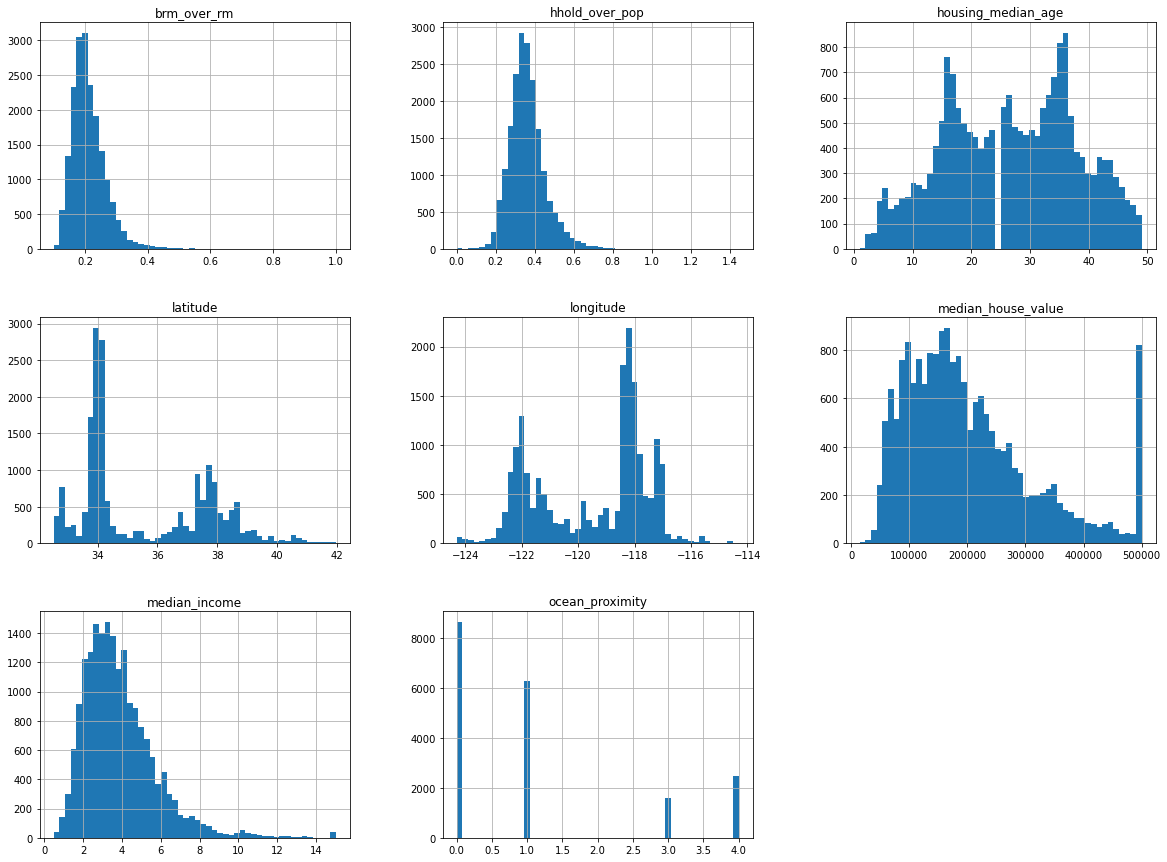

In [81]:
train_drop.hist(bins=50,figsize=(20,15))

In [82]:
train_drop = train_drop[(train_drop['median_house_value']) < 490000]
train_dist = train_dist[(train_dist['median_house_value']) < 490000]
train_mean = train_mean[(train_mean['median_house_value']) < 490000]

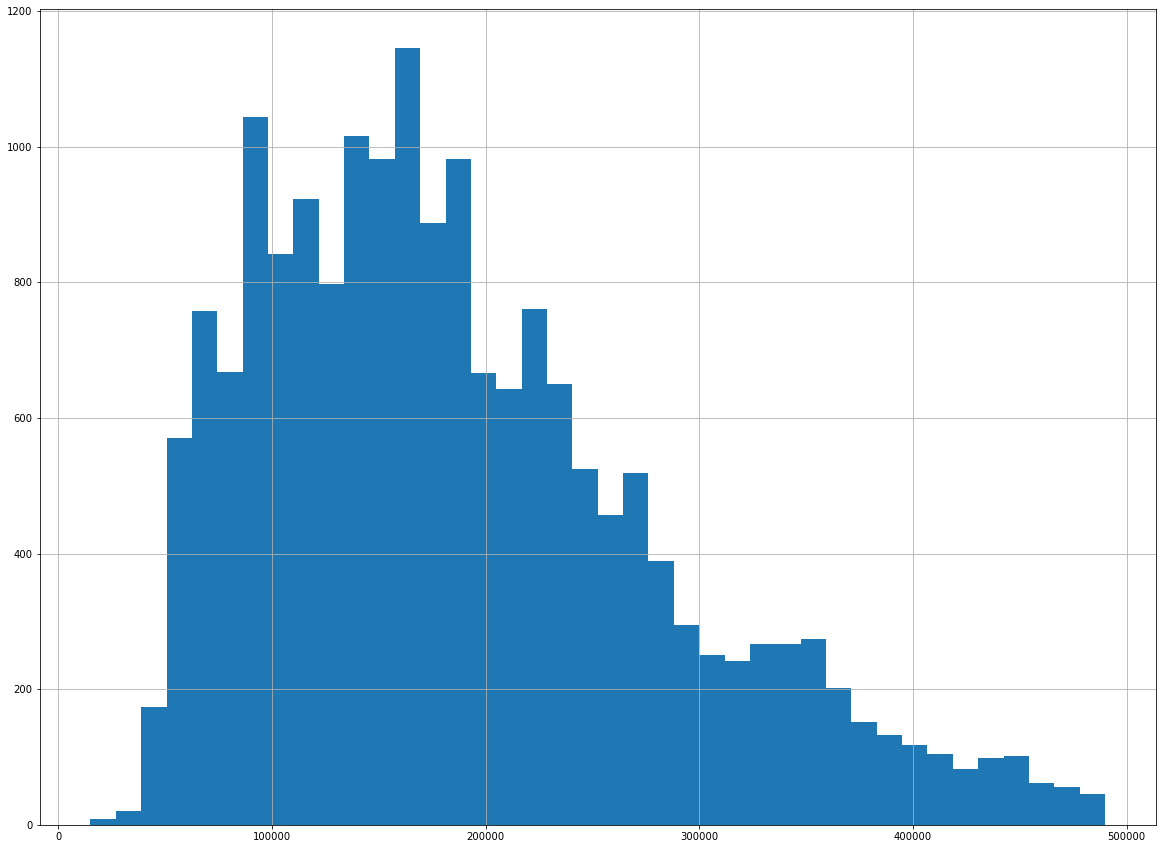

In [83]:
train_drop['median_house_value'].hist(bins=40,figsize=(20,15))

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(101)

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [86]:
train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18164 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18164 non-null  float64
 1   latitude            18164 non-null  float64
 2   housing_median_age  18164 non-null  float64
 3   median_income       18164 non-null  float64
 4   median_house_value  18164 non-null  float64
 5   ocean_proximity     18164 non-null  int64  
 6   brm_over_rm         18164 non-null  float64
 7   hhold_over_pop      18164 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.2 MB


In [87]:
train_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18355 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18355 non-null  float64
 1   latitude            18355 non-null  float64
 2   housing_median_age  18355 non-null  float64
 3   median_income       18355 non-null  float64
 4   median_house_value  18355 non-null  float64
 5   ocean_proximity     18355 non-null  int64  
 6   brm_over_rm         18355 non-null  float64
 7   hhold_over_pop      18355 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.3 MB


In [88]:
train_dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18355 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18355 non-null  float64
 1   latitude            18355 non-null  float64
 2   housing_median_age  18355 non-null  float64
 3   median_income       18355 non-null  float64
 4   median_house_value  18355 non-null  float64
 5   ocean_proximity     18355 non-null  int64  
 6   brm_over_rm         18164 non-null  float64
 7   hhold_over_pop      18355 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.3 MB


In [89]:
y_drop = train_drop['median_income']
x_drop = train_drop.drop('median_income', axis = 1)
y_mean = train_mean['median_income']
x_mean = train_mean.drop('median_income', axis = 1)
y_dist = train_dist['median_income']
x_dist = train_dist.drop('median_income', axis = 1)

In [92]:
x_dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18355 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18355 non-null  float64
 1   latitude            18355 non-null  float64
 2   housing_median_age  18355 non-null  float64
 3   median_house_value  18355 non-null  float64
 4   ocean_proximity     18355 non-null  int64  
 5   brm_over_rm         18164 non-null  float64
 6   hhold_over_pop      18355 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.1 MB


In [28]:
x.head()


,longitude,latitude,housing_median_age,median_house_value,ocean_proximity,brm_over_rm,hhold_over_pop
0,-122.23,37.88,41.0,452600.0,3,0.146591,0.391304
1,-122.22,37.86,21.0,358500.0,3,0.155797,0.473969
8,-122.26,37.84,42.0,226700.0,3,0.260274,0.493367
20,-122.27,37.85,40.0,147500.0,3,0.245007,0.405868
21,-122.27,37.85,42.0,159800.0,3,0.223917,0.393972


In [57]:
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(x_drop, y_drop, test_size=0.2, random_state=40)
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(x_mean, y_mean, test_size=0.2, random_state=40)
X_train_dist, X_test_dist, y_train_dist, y_test_dist = train_test_split(x_dist, y_dist, test_size=0.2, random_state=40)

In [102]:
rmse_test_drop = []
rmse_train_drop = []
z_drop = []

rmse_test_dist = []
rmse_train_dist = []
z_dist = []

rmse_test_mean = []
rmse_train_mean = []
z_mean = []
for i in range (2, 6):
    poly_features = PolynomialFeatures(degree=i, include_bias=False)
    X_poly_drop = poly_features.fit_transform(X_train_drop)
#     X_poly_dist = poly_features.fit_transform(X_train_dist)
    X_poly_mean = poly_features.fit_transform(X_train_mean)
    
    X_test_poly_drop = poly_features.fit_transform(X_test_drop)
#     X_test_poly_dist = poly_features.fit_transform(X_test_dist)
    X_test_poly_mean = poly_features.fit_transform(X_test_mean)
    
    lm1 = LinearRegression()
    lm1.fit(X_poly_drop, y_train_drop)
    
#     lm2 = LinearRegression()
#     lm2.fit(X_poly_dist, y_train_dist)
    
    lm3 = LinearRegression()
    lm3.fit(X_poly_mean, y_train_mean)
    
    test_pred_drop = lm1.predict(X_test_poly_drop)
#     test_pred_dist = lm2.predict(X_test_poly_dist)
    test_pred_mean = lm3.predict(X_test_poly_mean)
    
    train_pred_drop = lm1.predict(X_poly_drop)
#     train_pred_dist = lm2.predict(X_poly_dist)
    train_pred_mean = lm3.predict(X_poly_mean)
    
    rmse_test_drop.append(np.sqrt(metrics.mean_squared_error(y_test_drop, test_pred_drop)))
#     rmse_test_dist.append(np.sqrt(metrics.mean_squared_error(y_test_dist, test_pred_dist)))
    rmse_test_mean.append(np.sqrt(metrics.mean_squared_error(y_test_mean, test_pred_mean)))
            
    rmse_train_drop.append(np.sqrt(metrics.mean_squared_error(y_train_drop, train_pred_drop)))
#     rmse_train_dist.append(np.sqrt(metrics.mean_squared_error(y_train_dist, train_pred_dist)))
    rmse_train_mean.append(np.sqrt(metrics.mean_squared_error(y_train_mean, train_pred_mean)))
    
    z_drop.append(i)
#     z_dist.append(i)
    z_mean.append(i)
    

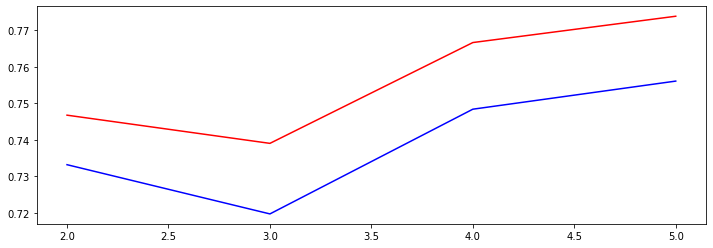

In [103]:
plt.figure(figsize=(12, 4))
plt.plot(z_mean, rmse_test_mean, 'r-')
plt.plot(z_mean, rmse_train_mean, 'b-')

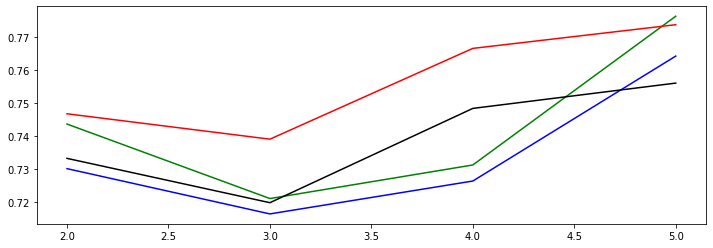

In [106]:
plt.figure(figsize=(12, 4))
plt.plot(z_drop, rmse_test_drop, 'g-')
plt.plot(z_drop, rmse_train_drop, 'b-')
plt.plot(z_mean, rmse_test_mean, 'r-')
plt.plot(z_mean, rmse_train_mean, 'k-')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ce2a110d0>,
      dtype=object)

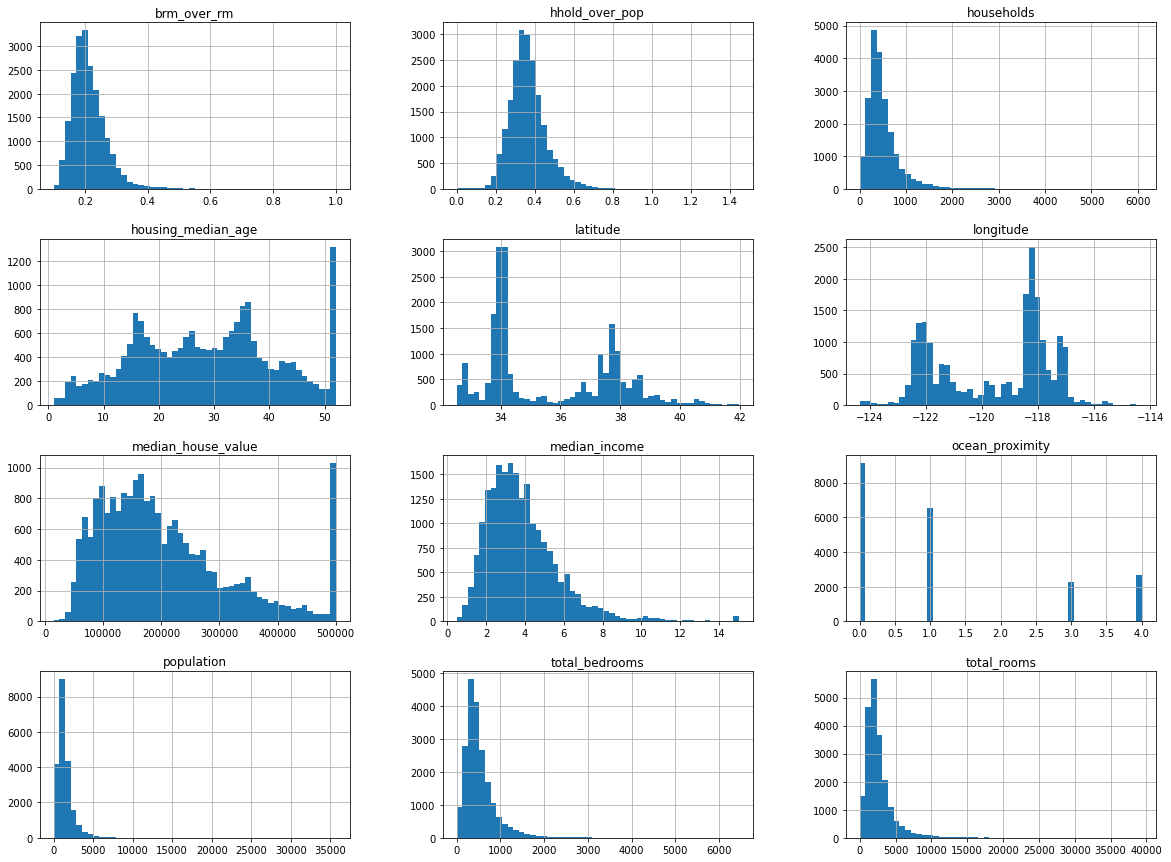

In [156]:
train.hist(bins=50,figsize=(20,15))

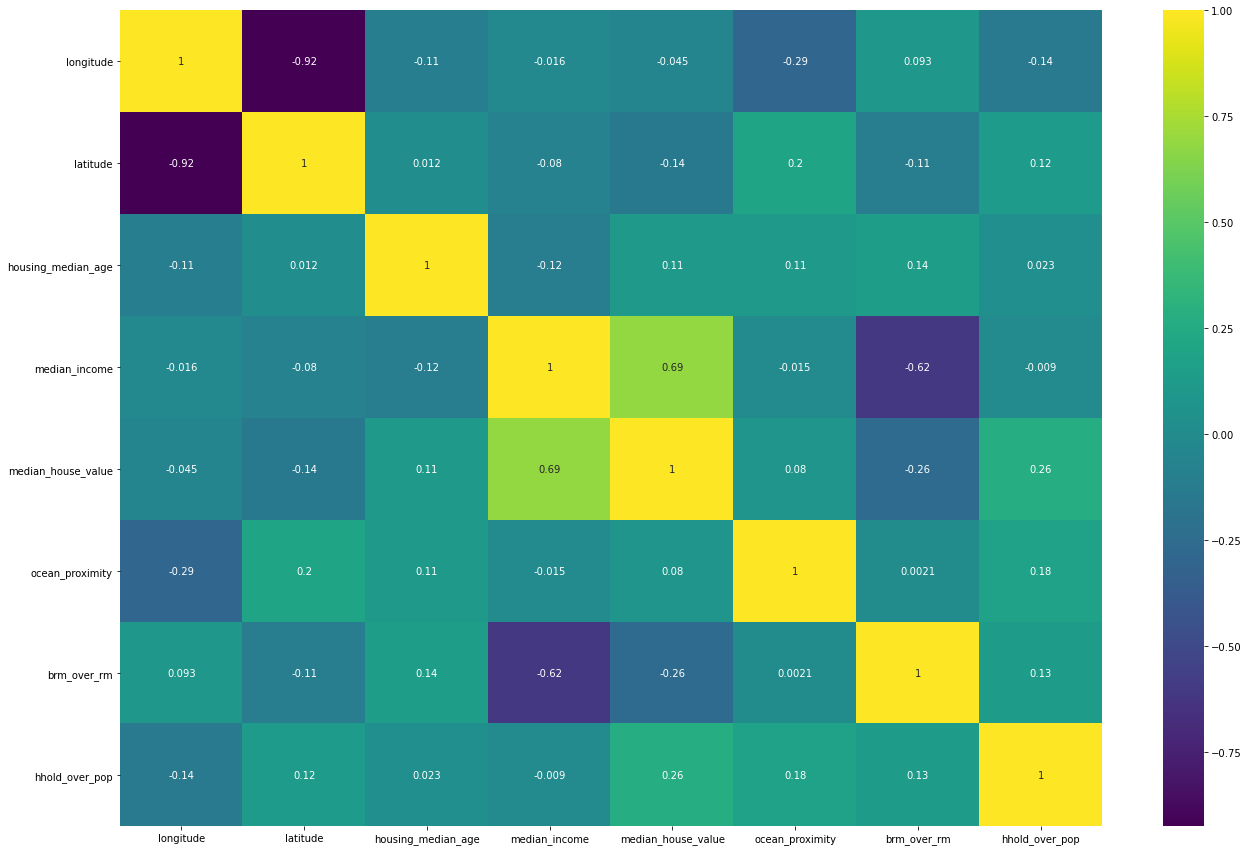

In [168]:
plt.figure(figsize=(22,15))
sns.heatmap(train_drop.corr(), annot=True, cmap='viridis')

In [169]:
X = train_drop.drop('median_income', axis=1)
Y = train_drop['median_income']

In [170]:
train_orig.min()

longitude              -124.350000
latitude                 32.540000
housing_median_age        1.000000
total_rooms               2.000000
total_bedrooms            1.000000
population                3.000000
households                1.000000
median_income             0.499900
median_house_value    14999.000000
ocean_proximity           0.000000
brm_over_rm               0.100000
hhold_over_pop            0.000804
dtype: float64

In [180]:
from sklearn.linear_model import LinearRegression
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model = LinearRegression()

In [181]:
model.fit(x_train, y_train)

LinearRegression()

In [182]:
y_pred = model.predict(x_test)

In [183]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

MAE: 0.74
MSE: 1.159
Root MSE: 1.077


In [184]:
# y_pred = y_pred.apply(lambda cancel: 1 if cancel > 0.6 else 0)
y_pred = np.where(y_pred > 0.6, 1, y_pred)
y_pred = np.where(y_pred <= 0.6, 0, y_pred)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [185]:
X = train_dist.drop('median_income', axis=1)
Y = train_dist['median_income']
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

MAE: 0.74
MSE: 1.159
Root MSE: 1.077


In [186]:
y_pred = np.where(y_pred > 0.6, 1, y_pred)
y_pred = np.where(y_pred <= 0.6, 0, y_pred)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [187]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [188]:
# from sklearn import metrics
# metrics.accuracy_score(y_test, y_pred)

In [189]:
X = train_mean.drop('median_income', axis=1)
Y = train_mean['median_income']
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root MSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))

MAE: 0.74
MSE: 1.159
Root MSE: 1.077


In [193]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

ValueError: continuous is not supported